## 3.Fit a CNN model on the dataset which has been assigned to you. Print a classification report to see the model metrics on train and test datasets.

In [1]:
# Importing Necessary Libraries

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [4]:
#!pip install split-folders[full]

In [5]:
import splitfolders

In [6]:
input_folder ='C:/Users/Tony Tomy/Downloads/data'

In [7]:
splitfolders.ratio(input_folder, output="C:/Users/Tony Tomy/Downloads/dataset",
                  seed=42, ratio=(.7, .2, .1),
                  group_prefix=None)

Copying files: 117 files [00:00, 1819.14 files/s]


In [8]:
# Setting Data Directories

train_dir = "C:/Users/Tony Tomy/Downloads/dataset/train"
test_dir = "C:/Users/Tony Tomy/Downloads/dataset/test"

# Getting the List of Categories

categories = sorted(os.listdir(train_dir))
num_classes = len(categories)
print('Number of Target Classes:', num_classes)
print(list(enumerate(categories)))

Number of Target Classes: 9
[(0, 'Black'), (1, 'Blue'), (2, 'Brown'), (3, 'Green'), (4, 'Violet'), (5, 'White'), (6, 'orange'), (7, 'red'), (8, 'yellow')]


In [9]:
categories = sorted(os.listdir(input_folder))

In [10]:
categories

['Black',
 'Blue',
 'Brown',
 'Green',
 'Violet',
 'White',
 'orange',
 'red',
 'yellow']

In [11]:
#pip uninstall opencv-python

In [12]:
#pip install opencv-python

In [13]:
# Creating Training and Testing Data

training_data = []
testing_data = []

count = 0

def create_training_data():
    for category in categories:
        global count
        path = os.path.join(train_dir, category)
        num_class = categories.index(category)
    for img in sorted(os.listdir(path)):
        img_array = cv2.imread(os.path.join(path, img))
        count = count + 1
        print("Images Currently Processed: ", count)
        rbg_img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        resized_array = cv2.resize(rbg_img_array, (64,64))
        training_data.append([resized_array, num_class])

def create_testing_data():
    for category in categories:
        global count
        path = os.path.join(test_dir, category)
        num_class = categories.index(category)
        for img in sorted(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img))
            count = count + 1
            print("Images Currently Processed: ", count)
            rbg_img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            resized_array = cv2.resize(rbg_img_array, (64,64))
            testing_data.append([resized_array, num_class])

create_training_data()
create_testing_data()

Images Currently Processed:  1
Images Currently Processed:  2
Images Currently Processed:  3
Images Currently Processed:  4
Images Currently Processed:  5
Images Currently Processed:  6
Images Currently Processed:  7
Images Currently Processed:  8
Images Currently Processed:  9
Images Currently Processed:  10
Images Currently Processed:  11
Images Currently Processed:  12
Images Currently Processed:  13
Images Currently Processed:  14
Images Currently Processed:  15
Images Currently Processed:  16
Images Currently Processed:  17
Images Currently Processed:  18
Images Currently Processed:  19
Images Currently Processed:  20
Images Currently Processed:  21
Images Currently Processed:  22
Images Currently Processed:  23


In [14]:
# Creating Training and Testing Numpy Arrays

x_train = []
y_train = []
x_test = []
y_test = []

for features, label in training_data:
    x_train.append(features)
    y_train.append(label)

for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print("Training Data Shape: ", x_train.shape)
print("Testing Data Shape: ", x_test.shape)
print("Training Label Shape: ", y_train.shape)
print("Testing Label Shape: ", y_test.shape)

Training Data Shape:  (7, 64, 64, 3)
Testing Data Shape:  (16, 64, 64, 3)
Training Label Shape:  (7,)
Testing Label Shape:  (16,)


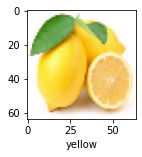

In [15]:
# Normalizing

x_train = x_train / 255
x_test = x_test / 255

# Plotting the first entry

def plot_sample(X, Y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(categories[Y[index]])

plot_sample(x_train, y_train, 0)

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [17]:
model = Sequential()


model.add(Conv2D(256, (3, 3), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
1/1 [==============================] - 1s 691ms/step - loss: -0.9476 - accuracy: 0.0000e+00 - val_loss: -186.9611 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 133ms/step - loss: -194.1075 - accuracy: 0.0000e+00 - val_loss: -643.3610 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 138ms/step - loss: -668.4304 - accuracy: 0.0000e+00 - val_loss: -1550.6040 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 136ms/step - loss: -1610.4176 - accuracy: 0.0000e+00 - val_loss: -3097.9875 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 133ms/step - loss: -3219.2446 - accuracy: 0.0000e+00 - val_loss: -5508.3569 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 126ms/step - loss: -5729.1504 - accuracy: 0.0000e+00 - val_loss: -9051.0957 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 125ms/step - loss:

In [18]:
# Fitting the model with Training Data

model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
1/1 [==============================] - 0s 143ms/step - loss: -42497.8984 - accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 143ms/step - loss: -57722.8828 - accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 145ms/step - loss: -76807.2109 - accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 147ms/step - loss: -100390.6328 - accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 146ms/step - loss: -129189.6641 - accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 147ms/step - loss: -163977.7656 - accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 146ms/step - loss: -205609.8594 - accuracy: 0.0000e+00
Epoch 8/20
1/1 [==============================] - 0s 147ms/step - loss: -255049.1250 - accuracy: 0.0000e+00
Epoch 9/20
1/1 [==============================] - 0s 145ms/step - loss: -313305.8438 - accuracy: 0.0000e+00
Epoch 10/20
1/1 [==============

In [19]:
# Calculating Loss and Accuracy

(loss, accuracy) = model.evaluate(x_test, y_test)
print("Loss = ", loss)
print("Accuracy = ", accuracy)

1/1 [==============================] - 0s 89ms/step - loss: -781917.0625 - accuracy: 0.0625
Loss =  -781917.0625
Accuracy =  0.0625


In [20]:
# Making Predictions

predictions = model.predict(x_test)
predictions = [np.argmax(element) for element in predictions]
predictions = np.array(predictions)

print("Predictions of First 5 Test Inputs: ", predictions[:5])
print("Actual Classes of First 5 Test Inputs: ", y_test[:5])

1/1 [==============================] - 0s 144ms/step
Predictions of First 5 Test Inputs:  [0 0 0 0 0]
Actual Classes of First 5 Test Inputs:  [0 0 1 2 2]


In [21]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.12      1.00      0.22         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1

    accuracy                           0.12        16
   macro avg       0.01      0.11      0.02        16
weighted avg       0.02      0.12      0.03        16



C:\Users\Tony Tomy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tony Tomy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tony Tomy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1. Have you come across Grid Search Cross Validation? Fit any two models covered in previous classes and optimize them using Grid search CV.

In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
 

dataset = load_breast_cancer()
X=dataset.data
Y=dataset.target
X_train, X_test, y_train, y_test = train_test_split( 
                        X,Y,test_size = 0.30, random_state = 101) 

model = SVC() 
model.fit(X_train, y_train) 
   
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [2]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
#
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

